# <span style="color: red">Jeu de donnée</span>

<h1 style="color:orange">Le code est à exécuter dans l'ordre !!!</h1>

In [71]:
#Importation des library
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from matplotlib.pyplot import figure
import random
import numpy as np
from scipy.stats import t
#Importation de la librairie statsmodels qui permet de faire une régression automatiquement
import statsmodels.api as sm

In [72]:
#Importation du fichier de données
data= pd.read_csv("data.csv", sep=",", index_col=0)

#stockage des noms des colonnes
keys = data.keys()

ind = data.index

shape = data.shape

#Affichage des 5 premières lignes
data.head()

,Accenteur mouchet,Corneille noire,Fauvette à tête noire,Geai des chênes,Goéland argenté,Grimpereau des jardins,Grive musicienne,Merle noir,Mésange bleue,Mésange charbonnière,...,Pigeon biset,Pigeon ramier,Pinson des arbres,Pouillot véloce,Roitelet huppé,Roitelet à triple bandeau,Rougegorge familier,Sittelle torchepot,Troglodyte mignon,Étourneau sansonnet
Mois,,,,,,,,,,,,,,,,,,,,,
janvier,1,22,0,4,0,3,1,22,16,22,...,1,37,3,0,4,0,14,0,5,33
fevrier,1,9,0,3,0,4,1,13,7,9,...,1,8,3,1,2,0,6,2,4,7
mars,0,25,6,2,1,7,3,24,16,12,...,17,24,11,3,1,2,9,2,10,16
avril,3,7,8,2,0,2,0,12,7,4,...,3,10,3,2,0,1,1,0,5,35
mai,0,7,10,1,0,5,0,24,4,2,...,8,9,6,4,0,0,11,0,7,48


# <span style="color: red">Analyse préliminaire : statistiques descriptives</span>

## 1.a) Combien d’individus, toutes espèces confondues et d’espèces différentes ont été observés dans le parc ?

In [73]:
#Pour connaître le nombre d'individus sans distinction de l'espèce
compteur = 0

for i in keys:
    compteur+=sum(data[i])
    
print("Il y'a eu au total " +str(compteur)+" oiseaux observés et repartis sur", shape[1]," espèces.")

Il y'a eu au total 1672 oiseaux observés et repartis sur 27  espèces.


In [74]:
#Pour connaître cette fois-ci le nombre d'individus par espèces

ind_per_species = {}

for i in keys :
    ind_per_species[i] = sum(data[i])
    
ind_per_species

{'Accenteur mouchet': 14,
 'Corneille noire': 161,
 'Fauvette à tête noire': 41,
 'Geai des chênes': 25,
 'Goéland argenté': 1,
 'Grimpereau des jardins': 44,
 'Grive musicienne': 6,
 'Merle noir': 179,
 'Mésange bleue': 100,
 'Mésange charbonnière': 88,
 'Mésange huppée': 2,
 'Mésange noire': 1,
 'Mésange à longue queue': 22,
 'Perruche à collier': 99,
 'Pic vert': 26,
 'Pic épeiche': 2,
 'Pie bavarde': 75,
 'Pigeon biset': 63,
 'Pigeon ramier': 232,
 'Pinson des arbres': 39,
 'Pouillot véloce': 14,
 'Roitelet huppé': 17,
 'Roitelet à triple bandeau': 15,
 'Rougegorge familier': 102,
 'Sittelle torchepot': 12,
 'Troglodyte mignon': 61,
 'Étourneau sansonnet': 231}

## 1.b) Quelle espèce a été la plus observée dans l’année ? Quelle espèce a été la moins observée dans l’année ? Pour chacune de ces deux espèces, combien d’individus ont été comptabilisés ?

In [75]:
#L'espèce la plus observé dans l'année

print("L'espèce la plus observée est le " +max(ind_per_species, key=ind_per_species.get)+" avec "+str(ind_per_species[max(ind_per_species, key=ind_per_species.get)])+" observations.")

L'espèce la plus observée est le Pigeon ramier avec 232 observations.


In [76]:
#L'espèce la moins observée dans l'année

print("L'espèce la moins observée est le " +min(ind_per_species, key=ind_per_species.get)+" avec "+str(ind_per_species[min(ind_per_species, key=ind_per_species.get)])+" observation.")

L'espèce la moins observée est le Goéland argenté avec 1 observation.


## 2.a) Certaines valeurs sont égales à 0 dans votre fichier. Interprétez.

### Une valeur égale à 0 s'interprète comme : "Cette espèce n'a pas été observé pour le mois X de l'année 2023."

## 2.b) Combien de mois et d’espèces différentes sont concernés ? 

In [77]:
# Initialiser une liste vide pour stocker les noms des espèces et les mois
zero_values = []

# Parcourir les index et les colonnes du DataFrame
for idx in ind:
    for col in keys:
        if data.loc[idx, col] == 0:
            # Ajouter le nom de l'espèce et du mois à la liste s'ils ont une valeur de zéro
            zero_values.append((col, idx))

# Afficher les noms des espèces et les mois correspondants aux valeurs égales à zéro et ajout des espèces concerné dans un tableau pour la supression plus tard
species_null = []
month_null = []
for zero in zero_values:
    print(f"L'espèce '{zero[0]}' n'a pas été repérée en '{zero[1]}'")
    species_null.append(zero[0])
    month_null.append(zero[1])


L'espèce 'Fauvette à tête noire' n'a pas été repérée en 'janvier'
L'espèce 'Goéland argenté' n'a pas été repérée en 'janvier'
L'espèce 'Mésange huppée' n'a pas été repérée en 'janvier'
L'espèce 'Mésange noire' n'a pas été repérée en 'janvier'
L'espèce 'Pic épeiche' n'a pas été repérée en 'janvier'
L'espèce 'Pouillot véloce' n'a pas été repérée en 'janvier'
L'espèce 'Roitelet à triple bandeau' n'a pas été repérée en 'janvier'
L'espèce 'Sittelle torchepot' n'a pas été repérée en 'janvier'
L'espèce 'Fauvette à tête noire' n'a pas été repérée en 'fevrier'
L'espèce 'Goéland argenté' n'a pas été repérée en 'fevrier'
L'espèce 'Mésange huppée' n'a pas été repérée en 'fevrier'
L'espèce 'Mésange noire' n'a pas été repérée en 'fevrier'
L'espèce 'Pic épeiche' n'a pas été repérée en 'fevrier'
L'espèce 'Roitelet à triple bandeau' n'a pas été repérée en 'fevrier'
L'espèce 'Accenteur mouchet' n'a pas été repérée en 'mars'
L'espèce 'Mésange huppée' n'a pas été repérée en 'mars'
L'espèce 'Mésange noire'

In [78]:
#suppression des doublons
species_null = list(set(species_null))
#nombre d'espèce differente concerné
print("Cela concerne "+str(len(species_null))+" espèces.")

Cela concerne 15 espèces.


In [79]:
#suppression des doublons
month_null = list(set(month_null))
#nombre de mois concerné
print("Cela concerne "+str(len(month_null))+" mois.")

Cela concerne 12 mois.


## 2.c) Supprimez ces espèces. Elles ne seront pas prises en compte dans la suite de notre analyse.

In [80]:
#Suppression des espèces n'ayant pas été observé pour au mois un mois
data_2=data.drop(species_null,axis=1)
data_2

,Corneille noire,Geai des chênes,Grimpereau des jardins,Merle noir,Mésange bleue,Mésange charbonnière,Perruche à collier,Pie bavarde,Pigeon biset,Pigeon ramier,Rougegorge familier,Troglodyte mignon
Mois,,,,,,,,,,,,
janvier,22,4,3,22,16,22,18,15,1,37,14,5
fevrier,9,3,4,13,7,9,2,8,1,8,6,4
mars,25,2,7,24,16,12,16,15,17,24,9,10
avril,7,2,2,12,7,4,7,1,3,10,1,5
mai,7,1,5,24,4,2,9,5,8,9,11,7
juin,15,1,5,23,8,10,13,8,3,25,11,12
juillet,10,2,5,11,6,3,4,5,4,13,4,2
aout,21,1,2,17,10,5,2,4,7,14,10,5
septembre,15,1,5,10,11,8,12,6,2,32,12,5


In [81]:
data_2.sum(axis=1).sort_values(ascending=False)

Mois
janvier      179
mars         177
juin         134
novembre     121
septembre    119
aout          98
mai           92
fevrier       74
juillet       69
octobre       67
avril         61
decembre      38
dtype: int64

In [82]:
data_2.sum(axis=0).sort_values(ascending=False)

Pigeon ramier             232
Merle noir                179
Corneille noire           161
Rougegorge familier       102
Mésange bleue             100
Perruche à collier         99
Mésange charbonnière       88
Pie bavarde                75
Pigeon biset               63
Troglodyte mignon          61
Grimpereau des jardins     44
Geai des chênes            25
dtype: int64

## 3) Calculez la variance du nombre d’oiseaux observés pour chaque espèce restante. Commentez. Quelle est l’espèce dont le nombre d’observations par mois varie le plus ? Quelle est l’espèce dont le nombre d’observations par mois varie le moins ?

In [83]:
# Utiliser la méthode describe() pour obtenir l'écart type
resume = data_2.describe()

# Utiliser la méthode var() pour obtenir la variance
variance = data_2.var()

# Rajouter la variance dans le résumé statistique
resume.loc['variance'] = variance

In [84]:
#espèce ayant la plus grande variance
max_var = variance.idxmax()

#espèce ayant la plus petite variance
min_var = variance.idxmin()

print("l’espèce dont le nombre d’observations par mois varie le plus est le "+max_var+ " avec une variance de "+str(round(resume[max_var]['variance'],2)))
print("l’espèce dont le nombre d’observations par mois varie le moins est le "+min_var+ " avec une variance de "+str(round(resume[min_var]['variance'],2)))

l’espèce dont le nombre d’observations par mois varie le plus est le Pigeon ramier avec une variance de 119.15
l’espèce dont le nombre d’observations par mois varie le moins est le Geai des chênes avec une variance de 2.45


## On décide de s’intéresser plus particulièrement aux perruches à collier.

## 4) Calculez la moyenne, la médiane, le minimum, le maximum et l’écart-type du nombre de perruches observées. Affichez l’histogramme de ces observations. Commentez

In [85]:
#Résumé statistique pour l'espèce "Perruches à collier"
resume["Perruche à collier"]

count       12.000000
mean         8.250000
std          5.528850
min          2.000000
25%          3.750000
50%          8.000000
75%         12.250000
max         18.000000
variance    30.568182
Name: Perruche à collier, dtype: float64

<Figure size 1440x720 with 0 Axes>

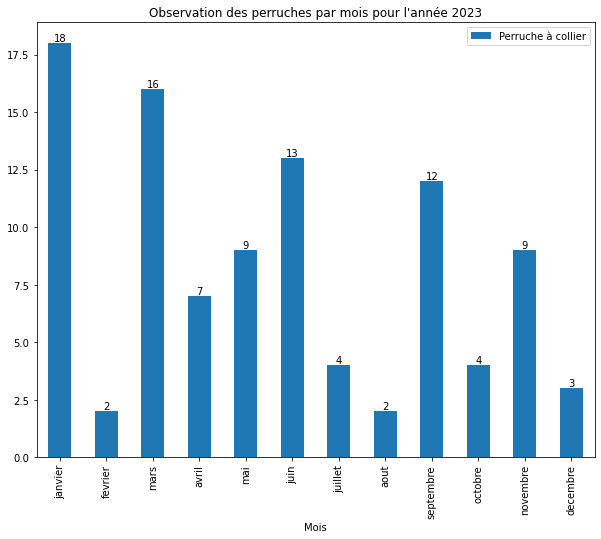

In [86]:
#Histogramme des observations de la "Perruches à collier"
data_2 =data_2.reset_index()
figure(figsize=(20.0, 10.0))

ax = data_2.plot.bar(x = 'Mois', y = 'Perruche à collier',figsize=(10,8))

# Ajouter les étiquettes de données
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(),
            '{:.0f}'.format(p.get_height()),
            ha='center', va='bottom')

# Afficher le diagramme
plt.title("Observation des perruches par mois pour l'année 2023")
plt.show()

In [87]:
#On réattribut les mois comme index
data_2 = data_2.set_index('Mois')

### <p style="color:blue">L'histogramme nous montre bel et bien qu'il y a une grande variation d'observation entre chaque mois pour l'espèce Perruche à collier</p>

## 5) Affichez l’évolution du nombre moyen d’individus observés par mois, toutes espèces confondues en ne prenant pas en compte les perruches à collier. Superposez sur cette même figure l’évolution du nombre de perruches à collier observées par mois. Comparez visuellement et quantitativement les deux courbes.

<AxesSubplot:title={'center':"Comparaison entre l'évolution du nombre moyen d'individus observé sans compter la Perruche à collier et l'évolution de l'apparition de cette même espèce pour l'année 2023"}, xlabel='Mois'>

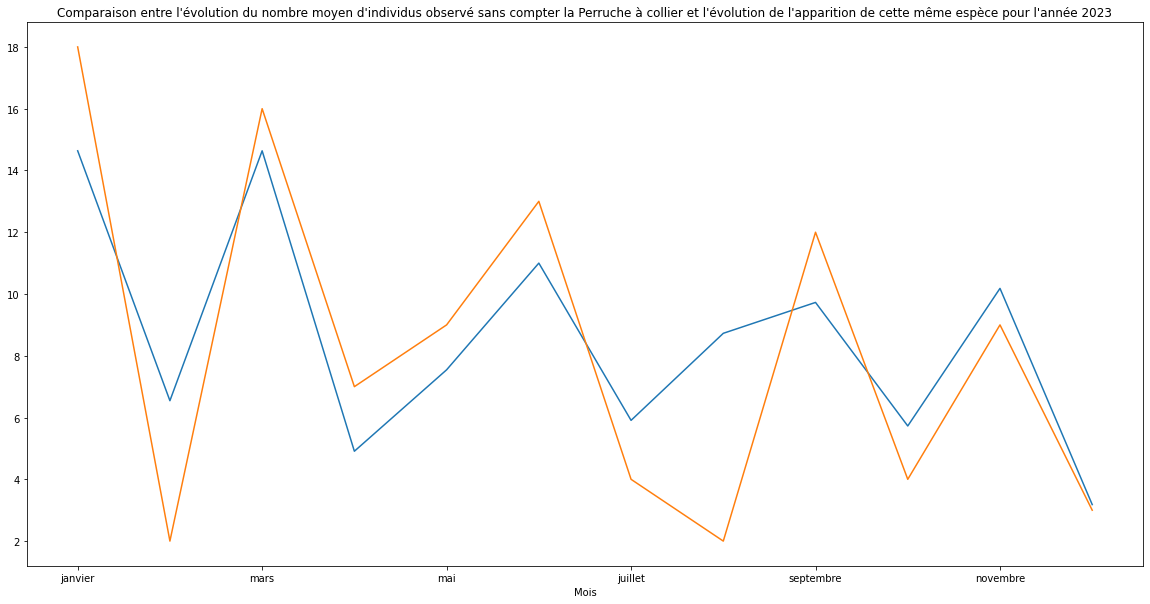

In [88]:
#L'évolution du nombre moyen d’individus observés par mois, toute espèce confondue en ne prenant pas en compte les perruches à collier
#réaffectation des mois en tant qu'indice

#suppression de la colonne concernant les perruches
data_3 = data_2.drop('Perruche à collier',axis=1)

#moyenne par mois axis = 1 pour les lignes 0 pour les colonnes
moyenne = data_3.mean(axis=1)


#Affichage des courbes
figure(figsize=(20.0, 10.0))
plt.title("Comparaison entre l'évolution du nombre moyen d'individus observé sans compter la Perruche à collier et l'évolution de l'apparition de cette même espèce pour l'année 2023")
moyenne.plot.line()
data_2['Perruche à collier'].plot.line()

<h3 style="color:blue">De janvier à décembre, on remarque que les deux courbes ont une tendance de variation assez similaire, notamment entre janvier et juillet, mais dans le cas de l'évolution du nombre d'observation des perruches les valeurs sont plus extrêmes comparé à l'évolution de la moyenne des observations pour toutes les espèces sans compter la perruche à collier.</h3>

<h3 style="color:blue">Ces tendances similaires peuvent indiquer une corrélation ou une relation entre ces variables. Cependant, la corrélation ne garantit pas une relation de cause à effet. Les interprétations possibles sont les suivantes : coïncidence fortuite, partage de facteurs environnementaux, interactions entre les espèces ou biais d'observation/méthodologie commune. Une analyse statistique approfondie est nécessaire pour évaluer la significativité de la corrélation observée. Il est important de prendre en compte les facteurs environnementaux communs qui peuvent influencer toutes les espèces et les interactions possibles entre elles. La similarité des tendances peut suggérer une corrélation, mais une analyse plus approfondie est nécessaire pour comprendre la nature de cette relation. En résumé, la similarité dans les observations des perruches et des autres espèces peut indiquer une corrélation, mais d'autres facteurs doivent être pris en compte pour évaluer l'existence d'une relation causale.</h3>

## 6.a) Calculez le coefficient de corrélation entre la variable Perruche à collier et chacune des autres variables. Quelle est la plus forte et la plus faible valeur obtenue ? A quelles espèces correspondent ces valeurs extrêmes ?

In [89]:
# Convertir toutes les colonnes en nombres
data_2 = data_2.apply(pd.to_numeric, errors='coerce')

# Calcule de la corrélation
keys_2 = data_2.keys()
corr={}
for k in keys_2:
    if k != 'Perruche à collier':
        corr_val = data_2['Perruche à collier'].corr(data_2[str(k)],method='pearson')
        corr[k] =  corr_val

corr

{'Corneille noire': 0.6207827503890743,
 'Geai des chênes': 0.2391330573195033,
 'Grimpereau des jardins': 0.543741117887576,
 'Merle noir': 0.65792374447988,
 'Mésange bleue': 0.7227407735142319,
 'Mésange charbonnière': 0.7535001525090185,
 'Pie bavarde': 0.7384542476563187,
 'Pigeon biset': 0.25875487242020156,
 'Pigeon ramier': 0.6417004227120185,
 'Rougegorge familier': 0.5905484226515593,
 'Troglodyte mignon': 0.6434771606507061}

In [90]:
print("L'évolution du nombre d'observation des Perruches à collier est fortement corrélé avec l'espèce "+max(corr, key=corr.get)+ " à "+str(round(corr[max(corr, key=corr.get)]*100,2))+"%")
print("L'évolution du nombre d'observation des Perruches à collier est faiblement corrélé avec l'espèce "+min(corr, key=corr.get)+ " à "+str(round(corr[min(corr, key=corr.get)]*100,2))+"%")

L'évolution du nombre d'observation des Perruches à collier est fortement corrélé avec l'espèce Mésange charbonnière à 75.35%
L'évolution du nombre d'observation des Perruches à collier est faiblement corrélé avec l'espèce Geai des chênes à 23.91%


## 6.b) Affichez le nombre d’observations de perruches à collier par mois en fonction du nombre d’observations par mois de l’espèce la plus fortement et faiblement corrélée. Sur chaque figure, représentez chaque mois par une couleur différente, et ajoutez une légende. Commentez.

In [92]:
#Génération de couleurs aléatoire pour les graphiques
def generate_random_color():
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    color_hex = '#{:02x}{:02x}{:02x}'.format(r, g, b)
    return color_hex

random_color = []
for i in range(data.shape[0]):
    random_color.append(generate_random_color())

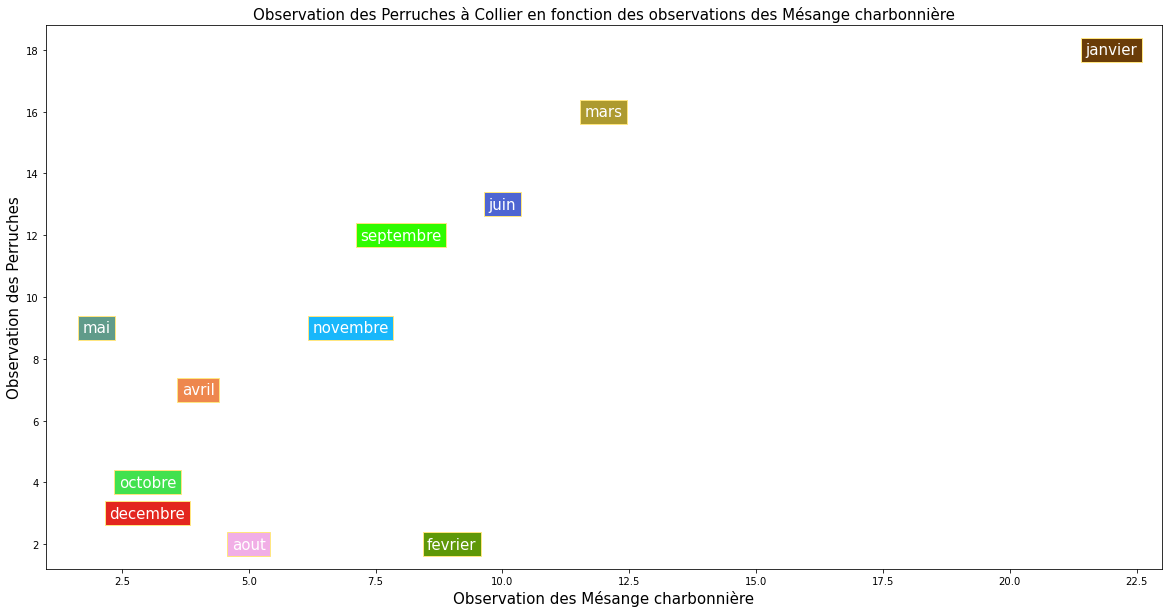

In [93]:
#Nuage de point entre les observations des Mésanges Charbonnière et des Perruches à collier labélisé en fonction du mois

figure(figsize=(20.0, 10.0))
plt.scatter(data_2[max(corr, key=corr.get)],data_2['Perruche à collier'])
plt.title("Observation des Perruches à Collier en fonction des observations des "+max(corr, key=corr.get), size=15)
plt.xlabel("Observation des "+max(corr, key=corr.get),fontsize=15)
plt.ylabel("Observation des Perruches", fontsize=15)
for i in range(data_2.shape[0]):
    plt.annotate(ind[i],(data_2[max(corr, key=corr.get)][i], data_2['Perruche à collier'][i]), size=15,
         ha="center", va="center",color="white",
             bbox=dict(boxstyle="square",
                   ec=(1., 0.9, 0.5),
                   fc=random_color[i]
                   )
         )

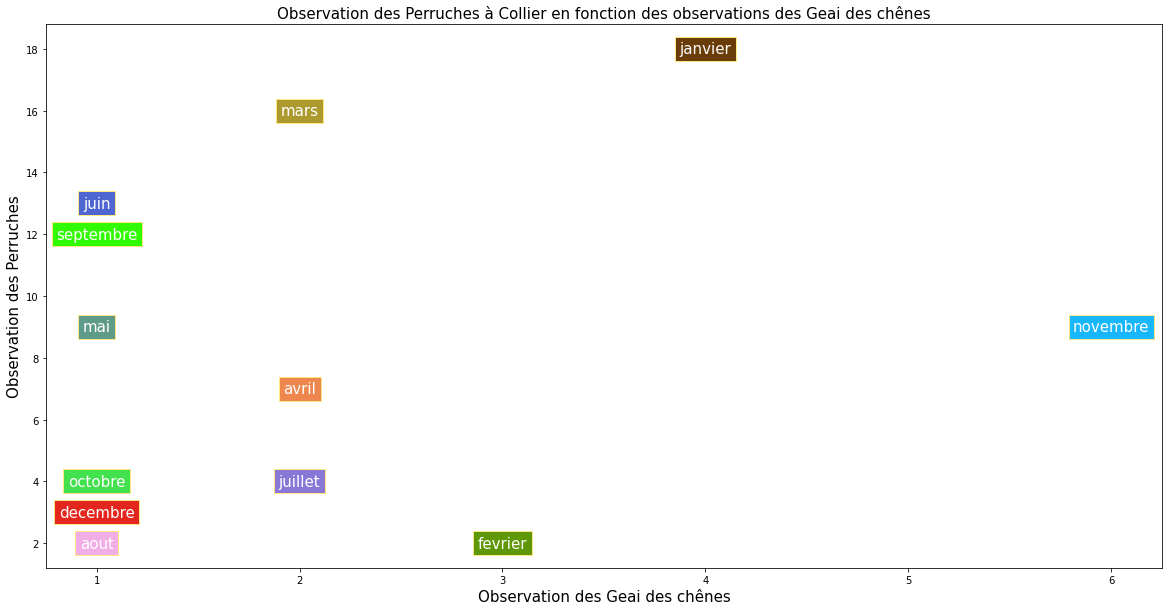

In [94]:
#Nuage de point entre les observations des Geai des chênes et des Perruches à collier labélisé en fonction du mois

figure(figsize=(20.0, 10.0))
plt.scatter(data_2[min(corr, key=corr.get)],data_2['Perruche à collier'])
plt.title("Observation des Perruches à Collier en fonction des observations des "+min(corr, key=corr.get), size=15)
plt.xlabel("Observation des "+min(corr, key=corr.get),fontsize=15)
plt.ylabel("Observation des Perruches", fontsize=15)
for i in range(data_2.shape[0]):
    plt.annotate(ind[i],(data_2[min(corr, key=corr.get)][i], data_2['Perruche à collier'][i]), size=15,
         ha="center", va="center",color="white",
             bbox=dict(boxstyle="square",
                   ec=(1., 0.9, 0.5),
                   fc=random_color[i]
                   )
         )

### <p style="color:blue">On voit que le nuage de point du nombre d'observation des perruches en fonction des mésanges tend à ressembler à une droite ce qui est la preuve de la forte corrélation entre les deux variables, à contrario le nuage des points en fonction de l'espèce Geai des chênes où l'allure ne ressemble pas à une droite.</p>

# <span style="color: red">Régression linéaire simple</span>

# <span style="color: purple">Cas pour la variable qui a la corrélation la plus forte</span>

## 11. Appliquez une régression linéaire. Quelle est la valeur du coefficient de détermination R2 – ajusté et non ajusté ? Donnez aussi les valeurs de β0 et β1 prédites par le modèle. Analysez quantitativement et visuellement vos résultats. 

In [95]:
#Application de la régression linéaire from scratch entre la variable perruche à collier et la mésange charbonnière


xy=np.array(data_2['Perruche à collier']*data_2[max(corr, key=corr.get)])
x=np.array(data_2[max(corr, key=corr.get)])
y=np.array(data_2['Perruche à collier'])

#Calcul de la covariance avec la formule Moy(XY)-Moy(X)*Moy(Y)
cov = np.mean(xy)-np.mean(x)*np.mean(y)

#Calcul des paramètres du modèle
a = cov/np.var(x)
b = np.mean(y)-a*np.mean(x)

print("Le coefficient directeur β1 vaut "+str(round(a,3))+ " et l'ordonné à l'origine β0 vaut "+str(round(b,3))+" ce qui nous donne la relation suivante "+str(round(a,3))+"x + "+str(round(b,3)))

Le coefficient directeur β1 vaut 0.74 et l'ordonné à l'origine β0 vaut 2.824 ce qui nous donne la relation suivante 0.74x + 2.824


In [96]:
#Calcul du coefficient de détermination R2 

n = len(y)

#Calcul des observations prédites par le modèle
y_chap = []

for i in x:
    y_chap.append(round(a*i+b,2))
    
y_chap = np.array(y_chap)


#Calcul de la somme du carré des résidus du modèle ainsi que la somme des écarts entre les observations et la moyenne des observations
SSR = 0
SST = 0
for i in range(len(x)):
    SSR+=(y_chap[i]-y[i])**2
    SST+=(y[i]-np.mean(y))**2

#Calcul du R2
R2=(1-(SSR/SST))*100

#Le R2 ajusté et non ajusté sont les mêmes dans le cas d'une régression simple, ce qui n'a pas d'intêret ici.
p=0
R2_adjust = 1 - ((1 - R2) * (n - 1))/ (n - p - 1)


print("On remarque que ",round(R2,2)," % de la dispersion est expliquée par le modèle de régression, ce qui est moyen.")

On remarque que  56.78  % de la dispersion est expliquée par le modèle de régression, ce qui est moyen.


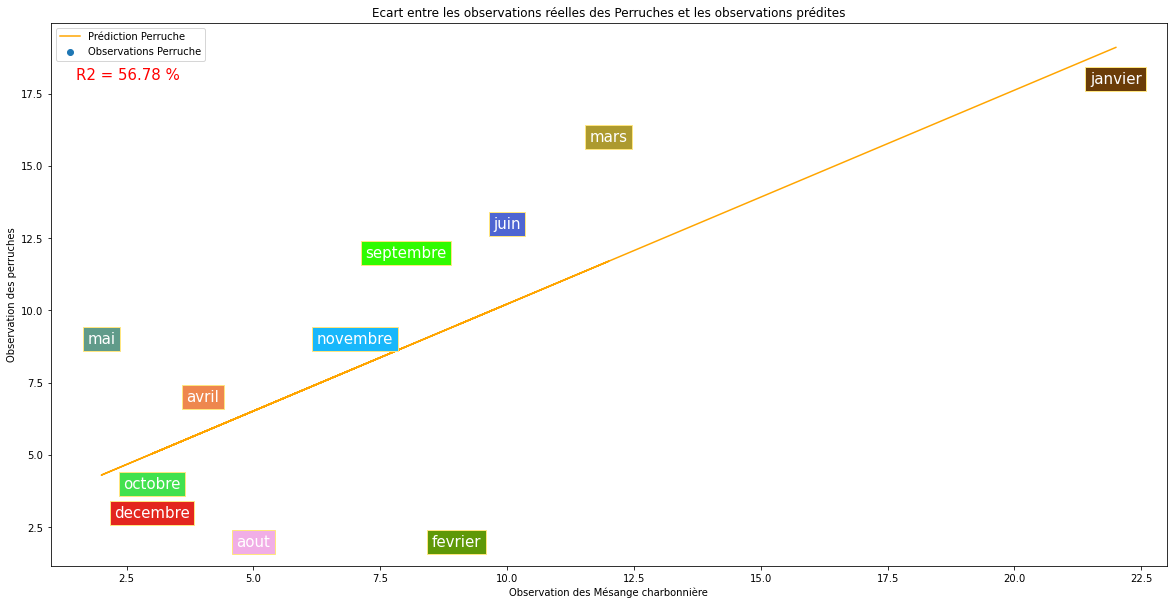

In [97]:
#Visuel des résultats
data_pred={"Mois":ind,"Perruche à collier":y,max(corr, key=corr.get):x,"Perruche à collier pred":y_chap}
data_pred=pd.DataFrame(data_pred).set_index('Mois')

figure(figsize=(20.0, 10.0))
plt.title("Ecart entre les observations réelles des Perruches et les observations prédites")

plt.plot(data_pred[max(corr, key=corr.get)], data_pred["Perruche à collier pred"],color="orange")
plt.scatter(data_pred[max(corr, key=corr.get)], data_pred["Perruche à collier"])
plt.legend(['Prédiction Perruche','Observations Perruche'])
plt.xlabel("Observation des "+max(corr, key=corr.get))
plt.ylabel("Observation des perruches")
plt.text(x=1.5, y=18, s="R2 = "+str(round(R2,2))+ " %", color="red", size=15)
for i in range(data_2.shape[0]):
    plt.annotate(ind[i],(data_2[max(corr, key=corr.get)][i], data_2['Perruche à collier'][i]), size=15,
         ha="center", va="center",color="white",
             bbox=dict(boxstyle="square",
                   ec=(1., 0.9, 0.5),
                   fc=random_color[i]
                   )
         )
plt.show()

<h3 style="color:blue"> On remarque aussi qu'il y'a forcément un grand écart entre les valeurs prédites et les valeurs réelles lorsque la variable X (ici la Mésange à collier) prend plusieurs fois la même valeur. On remarque aussi que la majorité des points sont en dessous de la droite de régression ce qui veut dire que notre modèle peut avoir une tendance à surestimer les résultats. </h3>

## 12. Calculez l’intervalle de confiance à 90% pour β0 et β1. Interprétez les résultats

###  <p style="color: blue">On sait que l'intervalle de confiance pour $\beta1$ vaut : [$A_n$ - $t^\frac{\alpha}{2}_{n-2}$ * $\sqrt{S^a_n}$ ; $A_n$ + $t^\frac{\alpha}{2}_{n-2}$ * $\sqrt{S^a_n}$]</p>

###  <p style="color: blue">Où $A_n$ est le coefficient directeur calculé, $t^\frac{\alpha}{2}_{n-2}$ est le quantile de la loi de student à n-2 de degré de liberté d'orde $\frac{\alpha}{2}$, et $\sqrt{S^a_n}$ qui est l'écart type empirique de $A_n$</p>

In [98]:
#estimation du coefficient directeur β1 que l'on va nommer An ici
An = a

#niveau de confiance
c=0.9

#Seuil d'erreur
alpha = 1-c

#Quantiles de la loi de Student
t_alpha = t.ppf(1-(alpha/2), n-2)

#Maintenant calculons S^a_n
#Pour cela il faut calculer d'abord Sn

Sn = SSR/(n-2)
San = Sn/(n*np.var(x))

#Calcule de l'intervalle de confiance 

borne_inf = An-t_alpha*San**(1/2)
borne_sup = An+t_alpha*San**(1/2)

a_sup=borne_sup
a_inf=borne_inf

print("Le coefficient directeur β1 a "+str(c*100)+"% de chance d'être compris entre "+str(round(borne_inf,3))+ " et "+str(round(borne_sup,3))+".\nOn remarque que l'intervalle est cohérent avec la valeur de β1 trouvée avec β1 = "+str(round(a,3))+" avec une taille d'intervalle de "+str(round(borne_sup,3)-round(borne_inf,3)))

Le coefficient directeur β1 a 90.0% de chance d'être compris entre 0.37 et 1.11.
On remarque que l'intervalle est cohérent avec la valeur de β1 trouvée avec β1 = 0.74 avec une taille d'intervalle de 0.7400000000000001


###  <p style="color: blue">L'intervalle de confiance pour $\beta0$  est de la forme : [$B_n$ - $t_2$ * $\sqrt{S^b_n}$ ; $B_n$ - $t_1$ * $\sqrt{S^b_n}$]</p>

In [99]:
#estimation du coefficient directeur β0 que l'on va nommer Bn
Bn = b

#Maintenant calculons S^b_n
x_square = np.sum(x*x)
Sbn = Sn*(x_square/(pow(n,2)*np.var(x)))

#Calcule de l'intervalle de confiance 

borne_inf = Bn-t_alpha*Sbn**(1/2)
borne_sup = Bn+t_alpha*Sbn**(1/2)

b_sup = borne_sup
b_inf = borne_inf

print("L'ordonnée à l'origine β0 a "+str(c*100)+"% de chance d'être compris entre "+str(round(borne_inf,3))+ " et "+str(round(borne_sup,3))+".\nOn remarque que l'intervalle est cohérent avec la valeur de β0 trouvée avec β0 = "+str(round(b,3))+" avec une taille d'intervalle de "+str(round(borne_sup,3)-round(borne_inf,3)))

L'ordonnée à l'origine β0 a 90.0% de chance d'être compris entre -0.544 et 6.192.
On remarque que l'intervalle est cohérent avec la valeur de β0 trouvée avec β0 = 2.824 avec une taille d'intervalle de 6.736000000000001


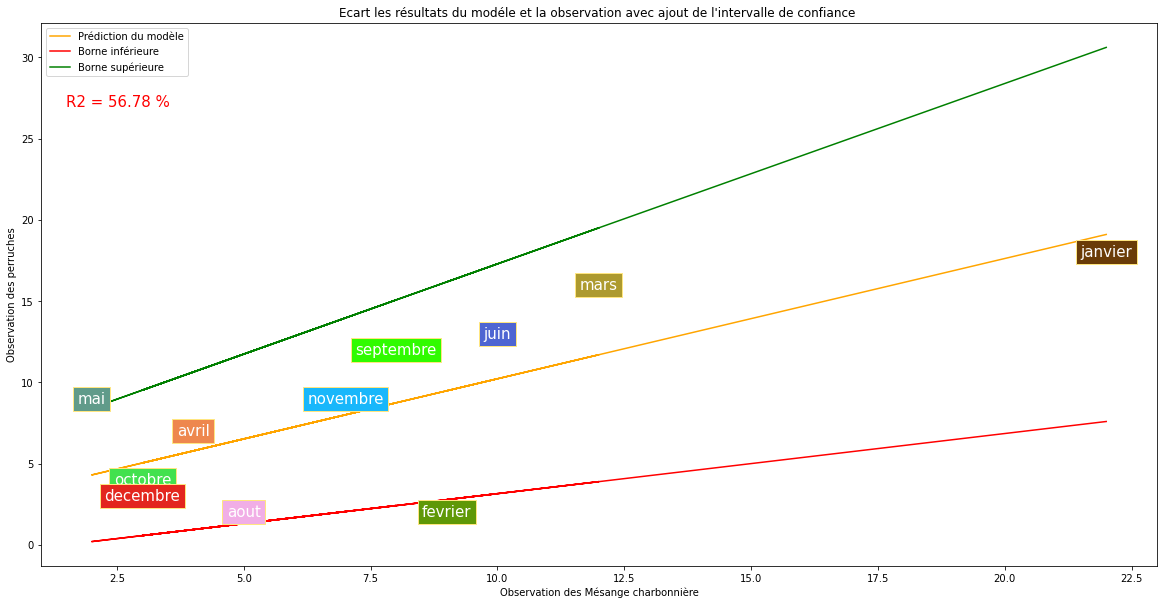

In [102]:
#Calcul des observations prédites par le modèle dans le pire et meilleur des cas

#Calcul des y chapeau avec cette fois-ci les paramètres estimés par l'intervalle de confiance
y_chap_inf,y_chap_sup = [],[]

for i in x:
    y_chap_inf.append(round(a_inf*i+b_inf,2))
    y_chap_sup.append(round(a_sup*i+b_sup,2))
    
y_chap_inf = np.array(y_chap_inf)
y_chap_sup = np.array(y_chap_sup)


data_pred['Perruche à collier pred inf']=y_chap_inf
data_pred['Perruche à collier pred sup']=y_chap_sup

#Visualisation des résultats
figure(figsize=(20.0, 10.0))
plt.title("Ecart les résultats du modéle et la observation avec ajout de l'intervalle de confiance ")

plt.scatter(data_pred[max(corr, key=corr.get)], data_pred["Perruche à collier"], color='blue')
plt.plot(data_pred[max(corr, key=corr.get)], data_pred["Perruche à collier pred"],color="orange")

plt.plot(data_pred[max(corr, key=corr.get)], data_pred["Perruche à collier pred inf"],color="red")
plt.plot(data_pred[max(corr, key=corr.get)], data_pred["Perruche à collier pred sup"],color="green")

plt.legend(['Prédiction du modèle','Borne inférieure','Borne supérieure'])
plt.xlabel("Observation des "+max(corr, key=corr.get))
plt.ylabel("Observation des perruches")
plt.text(x=1.5, y=27, s="R2 = "+str(round(R2,2))+ " %", color="red", size=15)
for i in range(data_2.shape[0]):
    plt.annotate(ind[i],(data_2[max(corr, key=corr.get)][i], data_2['Perruche à collier'][i]), size=15,
         ha="center", va="center",color="white",
             bbox=dict(boxstyle="square",
                   ec=(1., 0.9, 0.5),
                   fc=random_color[i]
                   )
         )
plt.show()

<h3 style="color: blue">On remarque que la taille des intervalles trouvées à un niveau de confiance de 90% sont très grandes,ce qui suggère une estimation peu précise des paramètres, spécialement pour l'intervalle de β0 qui a une taille de 6.74.</h3>
<h3 style="color: blue">Visuellement, quand on utilise les paramètres estimés par les intervalles de confiance pour prédire les observations, on constate que la plage entre les deux bornes s'élargit de plus en plus. On peut l'interpréter par une augmentation de l'incertitude ou de la variabilité des prédictions à mesure que l'on s'éloigne des valeurs centrales. Cela peut remettre en question la distribution linéaire des données que l'on peut expliquer par la taille de l'échantillons qui n'équivaut qu'à 12. La présence de point aberrant augmente l'incertitude de l'intervalle donc élargit la plage.</h3>

## 13. Evaluez l’hypothèse de pente nulle pour le coefficient β1 et concluez sur l’existence d’une relation linéaire entre les deux variables. Le coefficient β1 est-il significativement non nul ?

###  <p style="color: blue"> Le niveau de confiance n'étant pas précisé, on part du postulat qu'il est de 95% donc un seuil de signification 5%</p>

### <p style="color: blue"> On pose l'hypothèse H0 qui correspond à la pente nulle qui peut se traduire par :  β1 = 0.</p>
###  <p style="color: blue">L'hypothèse H1 correspond à une pente différente de 0 qui se traduit par : β1 $\neq$ 0</p>
###  <p style="color: blue">On doit alors vérifier la condition suivante pour rejeter H0 : P(|t|>$t^\frac{\alpha}{2}_{n-2}$) = $\alpha$.  Avec t valant $\frac{\beta1_{estimé} - \beta1}{ \sqrt{S^a_n}}$.</p>
### <p style="color: blue">Suite à cela, on doit calculer la p-value et verifié si elle est inferieur à 5% pour rejeter cette hypothèse</p>

In [103]:
# Ajout d'une constante à x pour estimer l'ordonnée à l'origine
X = sm.add_constant(x)

# Création du modèle de régression linéaire
model = sm.OLS(y, X)

# Ajustement du modèle aux données
results = model.fit()

# Affichage des résultats
print(results.summary(alpha=0.1))

# Récupération de la p-value associée à la pente
p_value = results.pvalues[1]

#Seuil de rejet
alpha = 0.05

#Effectuons le test
if p_value<alpha:
    print("\nOn rejette H0 donc on accepte H1 au seuil de "+str(alpha*100)+"%. Donc la probabilité que la pente soit nulle est de ",round(p_value*100,2),"% ce qui est très faible. Dans ce cas ci on peut affirmer qu'il y'a une relation linéaire entre les deux variables,et que les observations de la "+max(corr, key=corr.get)+" explique les apparitions de la perruche.")
else :
    print("\nOn accepte H0 donc on rejette H1 au seuil de "+str(alpha*100)+"%. Donc la probabilité que la pente soit nulle est de ",round(p_value*100,2),"% ce qui est grand. Dans ce cas-ci il n'y a pas de relation linéaire entre les deux variables, et le modèle devient Y = β0.")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     13.14
Date:                Mon, 29 May 2023   Prob (F-statistic):            0.00466
Time:                        17:13:09   Log-Likelihood:                -31.992
No. Observations:                  12   AIC:                             67.98
Df Residuals:                      10   BIC:                             68.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------
const          2.8236      1.858      1.520      0.1

C:\Users\imadr\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


###  <p style="color: blue">On rejette H0 donc on accepte H1 au seuil de 5.0%. Par conséquent, la probabilité que la pente soit nulle est de  0.47 % ce qui est inférieur à 5%. On peut affirmer alors qu'il y'a une relation linéaire entre les deux variables, et que les observations de la Mésange charbonnière explique les apparitions de la perruche.</p>

# <span style="color: purple">Cas pour la variable qui a la corrélation la plus faible</span>

## 11bis. Appliquez une régression linéaire. Quelle est la valeur du coefficient de détermination R2 – ajusté et non ajusté ? Donnez aussi les valeurs de β0 et β1 prédites par le modèle. Analysez quantitativement et visuellement vos résultats. 

In [104]:
xy=np.array(data_2['Perruche à collier']*data_2[min(corr, key=corr.get)])
x=np.array(data_2[min(corr, key=corr.get)])
y=np.array(data_2['Perruche à collier'])
cov = np.mean(xy)-np.mean(x)*np.mean(y)

a = cov/np.var(x)
b = np.mean(y)-a*np.mean(x)

print("Le coefficient directeur β1 vaut "+str(round(a,3))+ " et l'ordonné à l'origine β0 vaut "+str(round(b,3))+" ce qui nous donne la relation suivante "+str(round(a,3))+"x + "+str(round(b,3)))

Le coefficient directeur β1 vaut 0.845 et l'ordonné à l'origine β0 vaut 6.489 ce qui nous donne la relation suivante 0.845x + 6.489


In [105]:

n = len(y)

y_chap = []

for i in x:
    y_chap.append(round(a*i+b,2))
    
y_chap = np.array(y_chap)


SSR = 0
SST = 0
for i in range(len(x)):
    SSR+=(y_chap[i]-y[i])**2
    SST+=(y[i]-np.mean(y))**2

R2=(1-(SSR/SST))*100

print("On remarque que "+str(round(R2,2))+" % de la dispersion est expliquée par le modèle de régression. On peut donc considérer notre modèle comme mauvais.")

On remarque que 5.74 % de la dispersion est expliquée par le modèle de régression. On peut donc considérer notre modèle comme mauvais.


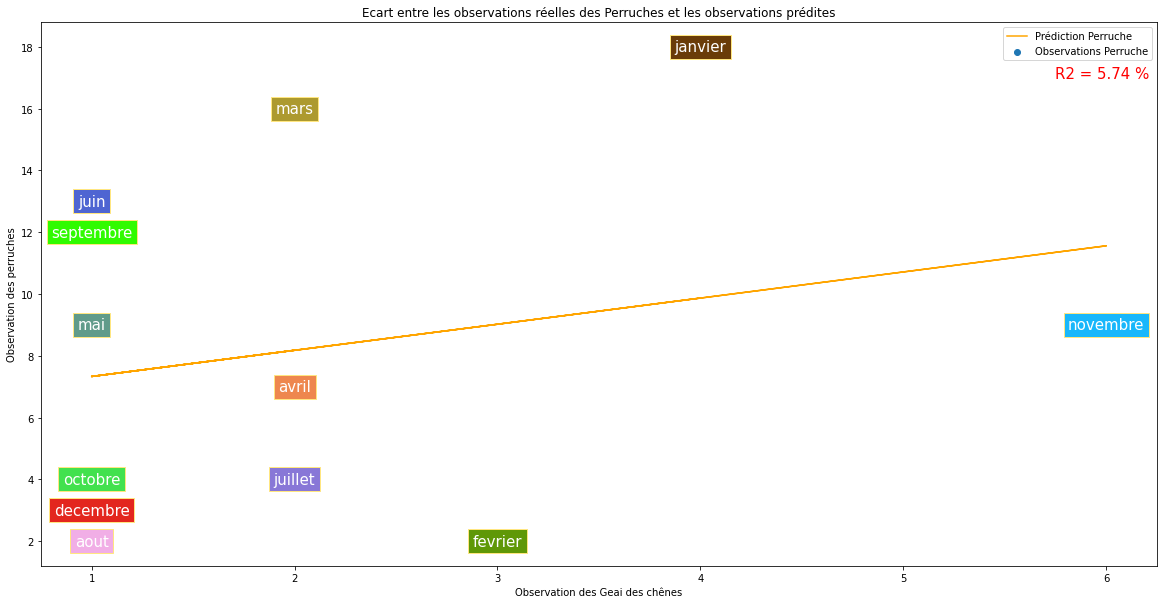

In [106]:
#Visuel des résultats
data_pred={"Mois":ind,"Perruche à collier":y,min(corr, key=corr.get):x,"Perruche à collier pred":y_chap}
data_pred=pd.DataFrame(data_pred).set_index('Mois')

figure(figsize=(20.0, 10.0))
plt.title("Ecart entre les observations réelles des Perruches et les observations prédites")
plt.scatter(data_pred[min(corr, key=corr.get)], data_pred["Perruche à collier"])
plt.plot(data_pred[min(corr, key=corr.get)], data_pred["Perruche à collier pred"],color="orange")
plt.legend(['Prédiction Perruche','Observations Perruche'])
plt.xlabel("Observation des "+min(corr, key=corr.get))
plt.ylabel("Observation des perruches")
plt.text(x=5.75, y=17, s="R2 = "+str(round(R2,2))+ " %", color="red", size=15)
for i in range(data_2.shape[0]):
    plt.annotate(ind[i],(data_2[min(corr, key=corr.get)][i], data_2['Perruche à collier'][i]), size=15,
         ha="center", va="center",color="white",
             bbox=dict(boxstyle="square",
                   ec=(1., 0.9, 0.5),
                   fc=random_color[i]
                   )
         )
plt.show()

###  <p style="color: blue">On note que le modèle est formellement mauvais, il y'a un trop grand écart entre les observations et les valeurs résultantes du modèle.</p>

## 12bis. Calculez l’intervalle de confiance à 90% pour β0 et β1. Interprétez les résultats

In [107]:
An = a

c=0.9

alpha = 1-c

t_alpha = t.ppf(1-(alpha/2), n-2)

Sn = SSR/(n-2)
San = Sn/(n*np.var(x))


borne_inf = An-t_alpha*San**(1/2)
borne_sup = An+t_alpha*San**(1/2)

a_sup=borne_sup
a_inf=borne_inf

print("Le coefficient directeur β1 a "+str(c*100)+"% de chance d'être compris entre "+str(round(borne_inf,3))+ " et "+str(round(borne_sup,3))+".\nOn remarque que l'intervalle est cohérent avec la valeur de β1 trouvée avec β1 = "+str(round(a,3))+" avec une taille d'intervalle de "+str(round(borne_sup,3)-round(borne_inf,3)))

Le coefficient directeur β1 a 90.0% de chance d'être compris entre -1.122 et 2.812.
On remarque que l'intervalle est cohérent avec la valeur de β1 trouvée avec β1 = 0.845 avec une taille d'intervalle de 3.934


In [108]:
Bn = b

x_square = np.sum(x*x)
Sbn = Sn*(x_square/(pow(n,2)*np.var(x)))


borne_inf = Bn-t_alpha*Sbn**(1/2)
borne_sup = Bn+t_alpha*Sbn**(1/2)

b_sup = borne_sup
b_inf = borne_inf

print("L'ordonnée à l'origine β0 a "+str(c*100)+"% de chance d'être compris entre "+str(round(borne_inf,3))+ " et "+str(round(borne_sup,3))+".\nOn remarque que l'intervalle est cohérent avec la valeur de β0 trouvée avec β0 = "+str(round(b,3))+" avec une taille d'intervalle de "+str(round(borne_sup,3)-round(borne_inf,3)))

L'ordonnée à l'origine β0 a 90.0% de chance d'être compris entre 1.443 et 11.535.
On remarque que l'intervalle est cohérent avec la valeur de β0 trouvée avec β0 = 6.489 avec une taille d'intervalle de 10.092


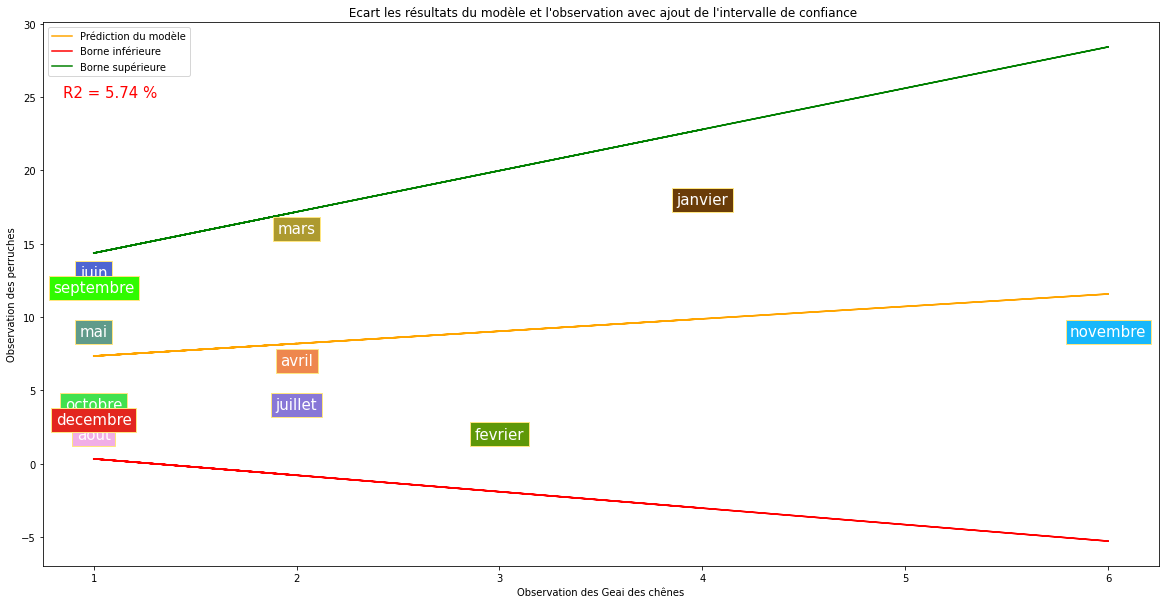

In [109]:
y_chap_inf,y_chap_sup = [],[]

for i in x:
    y_chap_inf.append(round(a_inf*i+b_inf,2))
    y_chap_sup.append(round(a_sup*i+b_sup,2))
    
y_chap_inf = np.array(y_chap_inf)
y_chap_sup = np.array(y_chap_sup)


data_pred['Perruche à collier pred inf']=y_chap_inf
data_pred['Perruche à collier pred sup']=y_chap_sup

figure(figsize=(20.0, 10.0))
plt.title(" Ecart les résultats du modèle et l'observation avec ajout de l'intervalle de confiance")

plt.scatter(data_pred[min(corr, key=corr.get)], data_pred["Perruche à collier"], color='blue')

plt.plot(data_pred[min(corr, key=corr.get)], data_pred["Perruche à collier pred"],color="orange")
plt.plot(data_pred[min(corr, key=corr.get)], data_pred["Perruche à collier pred inf"],color="red")
plt.plot(data_pred[min(corr, key=corr.get)], data_pred["Perruche à collier pred sup"],color="green")

plt.legend(['Prédiction du modèle','Borne inférieure','Borne supérieure'])
plt.xlabel("Observation des "+min(corr, key=corr.get))
plt.ylabel("Observation des perruches")
plt.text(x=0.85, y=25, s="R2 = "+str(round(R2,2))+ " %", color="red",size=15)
for i in range(data_2.shape[0]):
    plt.annotate(ind[i],(data_2[min(corr, key=corr.get)][i], data_2['Perruche à collier'][i]), size=15,
         ha="center", va="center",color="white",
             bbox=dict(boxstyle="square",
                   ec=(1., 0.9, 0.5),
                   fc=random_color[i]
                   )
         )
plt.show()

###  <p style="color: blue">On remarque que la taille des intervalles trouvées à un niveau de confiance de 90% sont très grand ce qui suggère une estimation très peu précise des paramètres du modèle. Visuellement, on constate le même comportement que lorsque l'on avait conçu le modèle avec l'espèce Mésange Charbonnière.</p>

## 13bis. Evaluez l’hypothèse de pente nulle pour le coefficient β1 et concluez sur l’existence d’une relation linéaire entre les deux variables. Le coefficient β1 est-il significativement non nul ?

In [110]:
X = sm.add_constant(x)

model = sm.OLS(y, X)

results = model.fit()

print(results.summary(alpha=0.1))

p_value = results.pvalues[1]

alpha = 0.05

if p_value<alpha:
    print("\nOn rejette H0 donc on accepte H1 au seuil de "+str(alpha*100)+"%. Donc la probabilité que la pente soit nulle est de ",round(p_value*100,2),"% ce qui est très faible. Dans ce cas ci on peut affirmer qu'il y'a une relation linéaire entre les deux variables,et que les observations de la "+max(corr, key=corr.get)+" explique les apparitions de la perruche.")
else :
    print("\nOn accepte H0 donc on rejette H1 au seuil de "+str(alpha*100)+"%. Donc la probabilité que la pente soit nulle est de ",round(p_value*100,2),"% ce qui est grand. Dans ce cas ci il n'y a pas de relation linéaire entre les deux variables, et le modèle devient Y = β0.")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                    0.6065
Date:                Mon, 29 May 2023   Prob (F-statistic):              0.454
Time:                        17:14:01   Log-Likelihood:                -36.672
No. Observations:                  12   AIC:                             77.34
Df Residuals:                      10   BIC:                             78.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------
const          6.4892      2.785      2.330      0.0

C:\Users\imadr\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


###  <p style="color: blue">On accepte H0 donc on rejete H1 au seuil de 5.0%. Donc la probabilité que la pente soit nulle est de  45.41 % ,ce qui est conséquent. Dans ce cas ci il n'y a pas de relation linéaire entre les deux variables, et le modèle devient Y = β0.</p>

# <span style="color: red">Régression linéaire multiple</span>

## 15. Combien y a-t-il de combinaisons possibles de variables – en excluant la variable Perruche à collier ? Appliquez une régression linéaire entre la variable cible Perruche à collier et chaque combinaison possible de variables autres. Quelle est la valeur maximale que vous obtenez pour le coefficient de détermination ajusté ? Affichez les variables correspondantes, ainsi que les paramètres βi obtenus. Commentez.

In [111]:
# Exclure la variable cible "Perruche à collier" du DataFrame
variables_predictives = data_2.drop(columns=['Perruche à collier'])

# Générer toutes les combinaisons possibles de variables
combinaisons = []
for r in range(1, len(variables_predictives.columns) + 1):
    combinaisons.extend(list(itertools.combinations(variables_predictives.columns, r)))
    
# Afficher le nombre total de combinaisons
nombre_combinaisons = len(combinaisons)
print("Il y'a ", nombre_combinaisons," combinaisons possibles.")


Il y'a  2047  combinaisons possibles.


In [112]:
# Initialiser une liste pour stocker les résultats
resultats_combinaisons = []
meilleur_r2 = -1
meilleure_combinaison = None
meilleure_paramètre = None
meilleure_resultat = None
# Effectuer la régression linéaire pour chaque combinaison
for combinaison in combinaisons:
    #Ajout de la constante à la matrice de la combinaison de variables
    predictors = sm.add_constant(variables_predictives[list(combinaison)])
    
    #Application de la régression linéaire entre la variable cible et la combinaison de variable prédictive 
    modele = sm.OLS(data_2['Perruche à collier'], predictors)
    
    #Ajustement du modèle
    resultats = modele.fit()
    
    # Extraire les coefficients et le R²
    coeffs = resultats.params
    r2 = resultats.rsquared_adj
    
    #recuperation du meilleur r2 avec la combinaison, les coeficient, et le details du résultat associé
    if r2 > meilleur_r2:
        meilleur_r2 = r2
        meilleure_combinaison = combinaison
        meilleure_paramètre = coeffs
        meilleure_resultat = resultats
    
    # Ajouter les résultats à la liste
    resultats_combinaisons.append((combinaison, coeffs, r2))

# Créer un DataFrame à partir des résultats
colonnes = ['Combinaison', 'Coefficients', 'R2_adj']
df_resultats = pd.DataFrame(resultats_combinaisons, columns=colonnes)



C:\Users\imadr\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\imadr\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)


In [113]:
# Afficher le DataFrame de résultats
df_resultats.sort_values(by=["R2_adj"],ascending=False).head()

,Combinaison,Coefficients,R2_adj
1996,"(Corneille noire, Geai des chênes, Grimpereau ...",const -2.535749 Corneille n...,0.922714
2041,"(Corneille noire, Geai des chênes, Grimpereau ...",const -3.083887 Corneille n...,0.905679
1540,"(Corneille noire, Geai des chênes, Grimpereau ...",const -1.976852 Corneille n...,0.870743
1835,"(Corneille noire, Geai des chênes, Grimpereau ...",const -2.579226 Corneille n...,0.858645
2036,"(Corneille noire, Geai des chênes, Grimpereau ...",const -2.717007 Corneille n...,0.846143


In [114]:
print("La valeur maximale que l'on obtient pour le R2 ajusté est ",round(meilleur_r2*100,2),"% pour la combinaison de variable :",meilleure_combinaison,".\nAvec les coefficients valants :\n",meilleure_paramètre,".")

La valeur maximale que l'on obtient pour le R2 ajusté est  92.27 % pour la combinaison de variable : ('Corneille noire', 'Geai des chênes', 'Grimpereau des jardins', 'Merle noir', 'Mésange charbonnière', 'Pie bavarde', 'Pigeon biset', 'Pigeon ramier', 'Troglodyte mignon') .
Avec les coefficients valants :
 const                    -2.535749
Corneille noire          -0.747747
Geai des chênes          -3.077674
Grimpereau des jardins    2.535496
Merle noir                0.328449
Mésange charbonnière      3.136956
Pie bavarde              -2.541204
Pigeon biset              1.333985
Pigeon ramier             0.165860
Troglodyte mignon        -0.845549
dtype: float64 .


In [115]:
print(round(meilleur_r2*100,2),"% de la dispersion est expliquée par le modèle de régression. On peut considérer que l'on a expliqué presque parfaitement l'apparition des perruches à l'aide de ",len(meilleure_combinaison)," autres espèces d'oiseaux.")

92.27 % de la dispersion est expliquée par le modèle de régression. On peut considérer que l'on a expliqué presque parfaitement l'apparition des perruches à l'aide de  9  autres espèces d'oiseaux.


<h3 style="color:blue">Un coefficient de détermination R² ajusté de 0.92 est considéré comme assez élevé et suggère que le modèle de régression linéaire ajusté explique environ 92% de la variance observée dans la variable cible (ici le nombre d'apparitions de la perruche à collier) en utilisant 9 espèces d'oiseaux prédictives.

A première vue, cela indique que les neuf espèces d'oiseaux ont une forte corrélation avec la variable cible et qu'elles fournissent des informations significatives pour prédire le nombre d'apparitions de la perruche à collier, mais voyons plus en détails les informations fourni sur ce modèle.</h3>

In [116]:
#Regardons en détails pour la meilleure combinaison les résultats
meilleure_resultat.summary(alpha=0.1)

C:\Users\imadr\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Perruche à collier   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     15.59
Date:                Mon, 29 May 2023   Prob (F-statistic):             0.0617
Time:                        17:14:31   Log-Likelihood:                -11.435
No. Observations:                  12   AIC:                             42.87
Df Residuals:                       2   BIC:                             47.72
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------------------
const                     -2.5357      1.481     -1.712      0.229      -6.861       1.789
Corneille noire           -0.7477      0.171     -4.381      0.048      -1.246      -0.249
Geai des chênes           -3.0777      0.916     -3.362      0.078      -5.751      -0.404
Grimpereau des jardins     2.5355      0.688      3.686      0.066       0.527       4.544
Merle noir                 0.3284      0.156      2.102      0.170      -0.128       0.785
Mésange charbonnière       3.1370      0.685      4.579      0.045       1.137       5.137
Pie bavarde               -2.5412      0.667     -3.810      0.063      -4.489      -0.594
Pigeon biset               1.3340      0.283      4.709      0.042       0.507       2.161
Pigeon ramier              0.1659      0.065      2.541      0.126      -0.025       0.356
Troglodyte mignon         -0.8455      0.453     -1.867      0.203      -2.168       0.477
==============================================================================
Omnibus:                        0.968   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.616   Jarque-Bera (JB):                0.241
Skew:                           0.347   Prob(JB):                        0.886
Kurtosis:                       2.962   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h3 style="color:blue">On remarque que la p-value de Fischer est de 0.062 donc on 6,17% de chance à ce que tous les coefficients soient nulle ce qui est supérieur à notre seuil de confirmation de $\alpha$=5 %. Cela signifie qu'il n'y a pas suffisamment de preuves statistiques pour conclure que la relation entre les variables est bel et bien linéaire. En plus de cela, la plupart des p-value associées au test d'hypothèse de la pente nulle pour chaque paramètre et au dessus du seuil de signification de 5%. Malgré un R2 presque parfait, certains arguments nous font douter de la qualité du modèle.</h3>

<h1>16. Déterminez expérimentalement le nombre de modèles pour lesquels on observe une
relation linéaire entre la variable cible et les autres variables sélectionnées. Reprenez la
question 15 en considérant uniquement ces modèles.</h1>

In [117]:
# Initialiser une liste pour stocker les résultats
resultats_combinaisons = []


# Effectuer la régression linéaire pour chaque combinaison
for combinaison in combinaisons:
    # Ajout de la constante à la matrice de la combinaison de variables
    variables_predictives = data[list(combinaison)]
    predictors = sm.add_constant(variables_predictives)

    # Application de la régression linéaire entre la variable cible et la combinaison de variables prédictives
    modele = sm.OLS(data_2['Perruche à collier'], predictors)

    # Ajustement du modèle
    resultats = modele.fit()

    # Vérifier si le modèle présente une relation linéaire significative
    #p_values = resultats.pvalues.drop('const')  # Exclure la constante
    f_stat = resultats.f_pvalue
    
    if (f_stat < alpha) :
        # Ajouter les résultats à la liste
        resultats_combinaisons.append((combinaison, resultats.params, resultats.rsquared_adj,resultats.f_pvalue,resultats.pvalues))

# Nombre de modèles avec une relation linéaire significative
nb_modeles_significatifs = len(resultats_combinaisons)

# Créer un DataFrame à partir des résultats
colonnes = ['Combinaison', 'Coefficients', 'R2_adj', 'Fischer_stat','P_value']
df_resultats = pd.DataFrame(resultats_combinaisons, columns=colonnes)

# Afficher le nombre de modèles avec une relation linéaire significative
print("Nombre de modèles avec une relation linéaire significative :", nb_modeles_significatifs)

Nombre de modèles avec une relation linéaire significative : 455


In [118]:
df_resultats.sort_values(by=["R2_adj"],ascending=False).head()

,Combinaison,Coefficients,R2_adj,Fischer_stat,P_value
451,"(Corneille noire, Geai des chênes, Grimpereau ...",const -1.976852 Corneille n...,0.870743,0.016071,const 0.328686 Corneille n...
454,"(Corneille noire, Geai des chênes, Grimpereau ...",const -2.579226 Corneille n...,0.858645,0.046321,const 0.288173 Corneille n...
453,"(Corneille noire, Geai des chênes, Mésange ble...",const -6.071198 Corneille noir...,0.795950,0.038217,const 0.053085 Corneille noir...
428,"(Corneille noire, Geai des chênes, Grimpereau ...",const -0.300348 Corneille n...,0.778445,0.021842,const 0.891350 Corneille n...
452,"(Corneille noire, Geai des chênes, Grimpereau ...",const -0.087544 Corneille n...,0.770989,0.047384,const 0.969296 Corneille n...


In [119]:
# Trouver l'index de la ligne avec le R2 max
index_max = df_resultats['R2_adj'].idxmax()

# Récupérer la ligne correspondante du DataFrame
print(round(df_resultats['R2_adj'][index_max]*100,2),"% de la variance des observations des perruches est expliquée par les observations des espèces :",df_resultats['Combinaison'][index_max],".\nEn plus de cela on a une p-value de Fischer de ",round(df_resultats['Fischer_stat'][index_max]*100,2),"% donc on peut affirmer une relation linéaire entre les variables au seuil de signification de ",round(alpha*100),"%.")

87.07 % de la variance des observations des perruches est expliquée par les observations des espèces : ('Corneille noire', 'Geai des chênes', 'Grimpereau des jardins', 'Mésange charbonnière', 'Pie bavarde', 'Pigeon biset', 'Pigeon ramier') .
En plus de cela on a une p-value de Fischer de  1.61 % donc on peut affirmer une relation linéaire entre les variables au seuil de signification de  5 %.


### <p style="color:blue">Pour la question 15, le meilleur modèle n'était défini que par son R2. Toutefois, on note que même si l'on obtenait un  R2 de 92%, la p-value de Fischer valait 6.17% qui est au dessus du seuil de signification de 5% donc on pouvait avoir des doutes sur la qualité du modèle. Dorénavant, on prend cette statistique en considération et on rajoute 2 conditions au choix de la qualité du modèle et nous obtenons un modèle qui a un R2 qui explique 87,07% de la variance des observations de la Perruche à l'aide de 7 autres espèces avec une p-value de Fischer de 1.6%. On peut affirmer que c'est le meilleur modèle selon les conditions que nous nous sommes fixées.</p>